In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
# Carga de archivo 
ruta_archivo = "proyecto_training_data.npy"
datos = np.load(ruta_archivo)
np.set_printoptions(suppress=True)

# Ver la estructura del dataset
print("Tipo de datos:", type(datos))
print("Forma del dataset:", datos.shape)
print("Primeras filas del dataset:\n", datos[:10])

Tipo de datos: <class 'numpy.ndarray'>
Forma del dataset: (1460, 6)
Primeras filas del dataset:
 [[208500.      7.    856.      8.   2003.     65.]
 [181500.      6.   1262.      6.   1976.     80.]
 [223500.      7.    920.      6.   2001.     68.]
 [140000.      7.    961.      7.   1915.     60.]
 [250000.      8.   1145.      9.   2000.     84.]
 [143000.      5.    796.      5.   1993.     85.]
 [307000.      8.   1694.      7.   2004.     75.]
 [200000.      7.   1107.      7.   1973.     nan]
 [129900.      7.   1022.      8.   1931.     51.]
 [118000.      5.   1077.      5.   1939.     50.]]


In [24]:
# Dividir en entrenamiento (80%) y validación (20%)
train_data, val_data = train_test_split(datos, test_size=0.2, random_state=2025)

# Verificar tamaños
print("Tamaño del conjunto de entrenamiento:", train_data.shape)
print("Tamaño del conjunto de validación:", val_data.shape)

Tamaño del conjunto de entrenamiento: (1168, 6)
Tamaño del conjunto de validación: (292, 6)


In [25]:
# Convertir el dataset a un dataframe de pandas y asignar los datos correspondientes a entrenamiento y validación
columnas = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
df = pd.DataFrame(datos, columns=columnas)
df_train = pd.DataFrame(train_data, columns=columnas)
df_val = pd.DataFrame(val_data, columns=columnas)

# Mostrar primeras filas del conjunto de entrenamiento
print("Entrenamiento: \n", df_train.head())

# Mostrar primeras filas del conjunto de validación
print("Validación: \n", df_val.head())

Entrenamiento: 
    SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   142000.0          5.0    1188.0           6.0     1959.0          NaN
1   146000.0          7.0     703.0           5.0     2007.0         34.0
2   256300.0          8.0    1600.0           7.0     2007.0        110.0
3   128000.0          6.0     958.0           5.0     1976.0          NaN
4    85000.0          5.0     536.0           4.0     1976.0         36.0
Validación: 
    SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   147000.0          5.0     672.0           6.0     1920.0         59.0
1   266000.0          9.0    1684.0           6.0     2005.0         63.0
2   262280.0          7.0    1532.0          10.0     1990.0         86.0
3   221500.0          7.0    1614.0           7.0     2005.0         86.0
4   168000.0          4.0    1622.0           7.0     1961.0          NaN


In [26]:
# Revisar NaN en cada columna
nulls = df.isnull().sum()

# Revisar blanks en cada columna
blanks = (df == "").sum()

blanks_nulls = pd.DataFrame({
    'Variable': df.columns,
    'Blank Counts': blanks,
    'NaN Counts': nulls
})
print(blanks_nulls)

                  Variable  Blank Counts  NaN Counts
SalePrice        SalePrice             0           0
OverallQual    OverallQual             0           0
1stFlrSF          1stFlrSF             0           0
TotRmsAbvGrd  TotRmsAbvGrd             0           0
YearBuilt        YearBuilt             0           0
LotFrontage    LotFrontage             0         259


In [27]:
# Reemplazar nulls con media en LotFrontage (única columna con nulls)
imputer = SimpleImputer(strategy="mean")
df["LotFrontage"] = imputer.fit_transform(df[["LotFrontage"]]) 

In [28]:
# Resumen estadístico de los datos
stats_df = df.describe()
print(stats_df)

           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  1087.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1391.250000      7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000     14.000000  2010.000000   

       LotFrontage  
count  1460.000000  
mean     70.049958  
std      22.024023  
min      21.000000  
25%      60.000000  
50%      70.049958  
75%      79.000000  
max     313.000000  


In [29]:
# Resumen estadístico calculado "manual"
stats = {
    'Mean': df[columnas].mean(),
    'Max': df[columnas].max(),
    'Min': df[columnas].min(),
    'Range': df[columnas].max() - df[columnas].min(),
    'Standard Deviation': df[columnas].std()
}

stats_df = pd.DataFrame(stats)
stats_df = stats_df.T

print(stats_df)

                        SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd  \
Mean                180921.195890     6.099315  1162.626712      6.517808   
Max                 755000.000000    10.000000  4692.000000     14.000000   
Min                  34900.000000     1.000000   334.000000      2.000000   
Range               720100.000000     9.000000  4358.000000     12.000000   
Standard Deviation   79442.502883     1.382997   386.587738      1.625393   

                      YearBuilt  LotFrontage  
Mean                1971.267808    70.049958  
Max                 2010.000000   313.000000  
Min                 1872.000000    21.000000  
Range                138.000000   292.000000  
Standard Deviation    30.202904    22.024023  


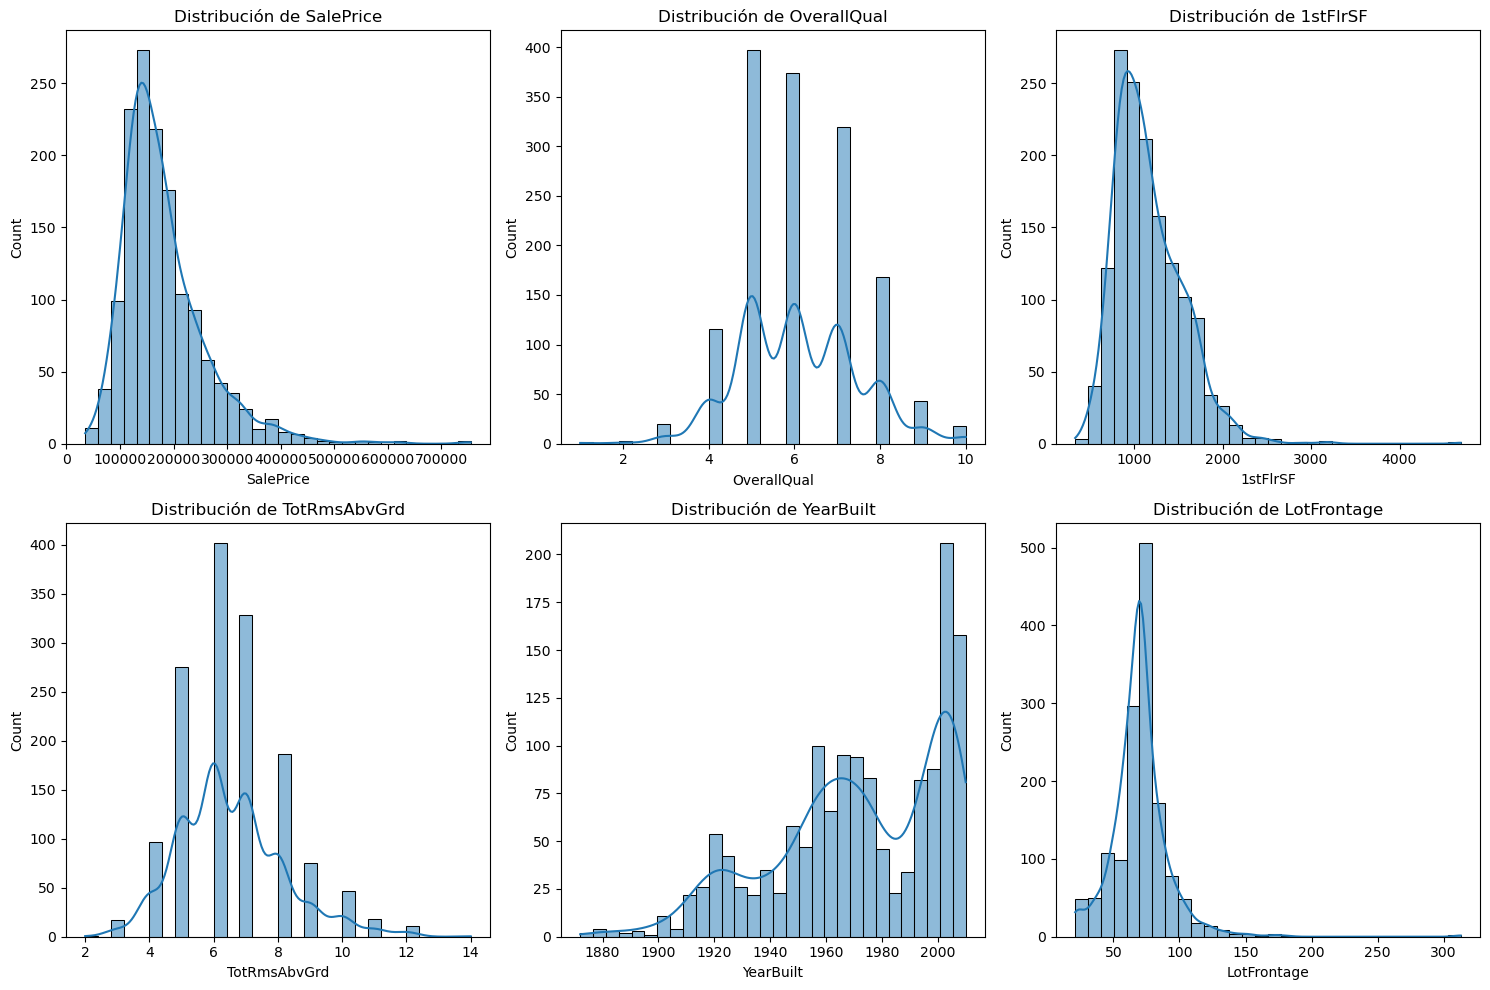

In [30]:
# Histograma de cada variable (una sola vista 2x3)
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, variable in enumerate(columnas):
    ax = axes[i//3, i%3]
    sns.histplot(df[variable], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribución de {variable}")
plt.tight_layout()
plt.show()

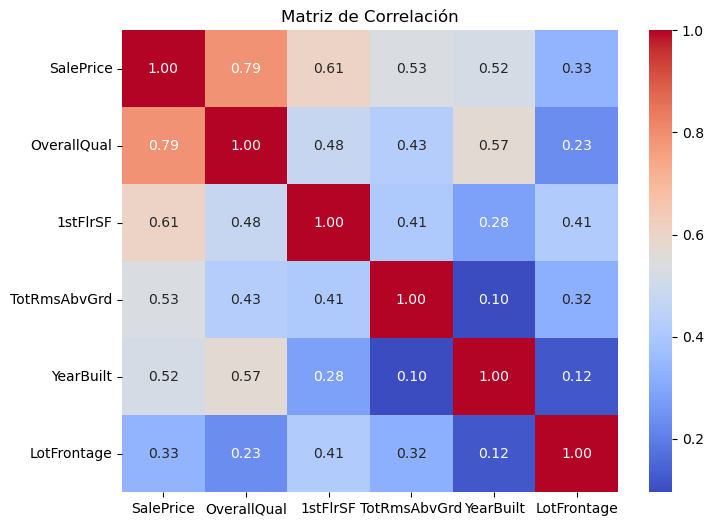

In [31]:
# Matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

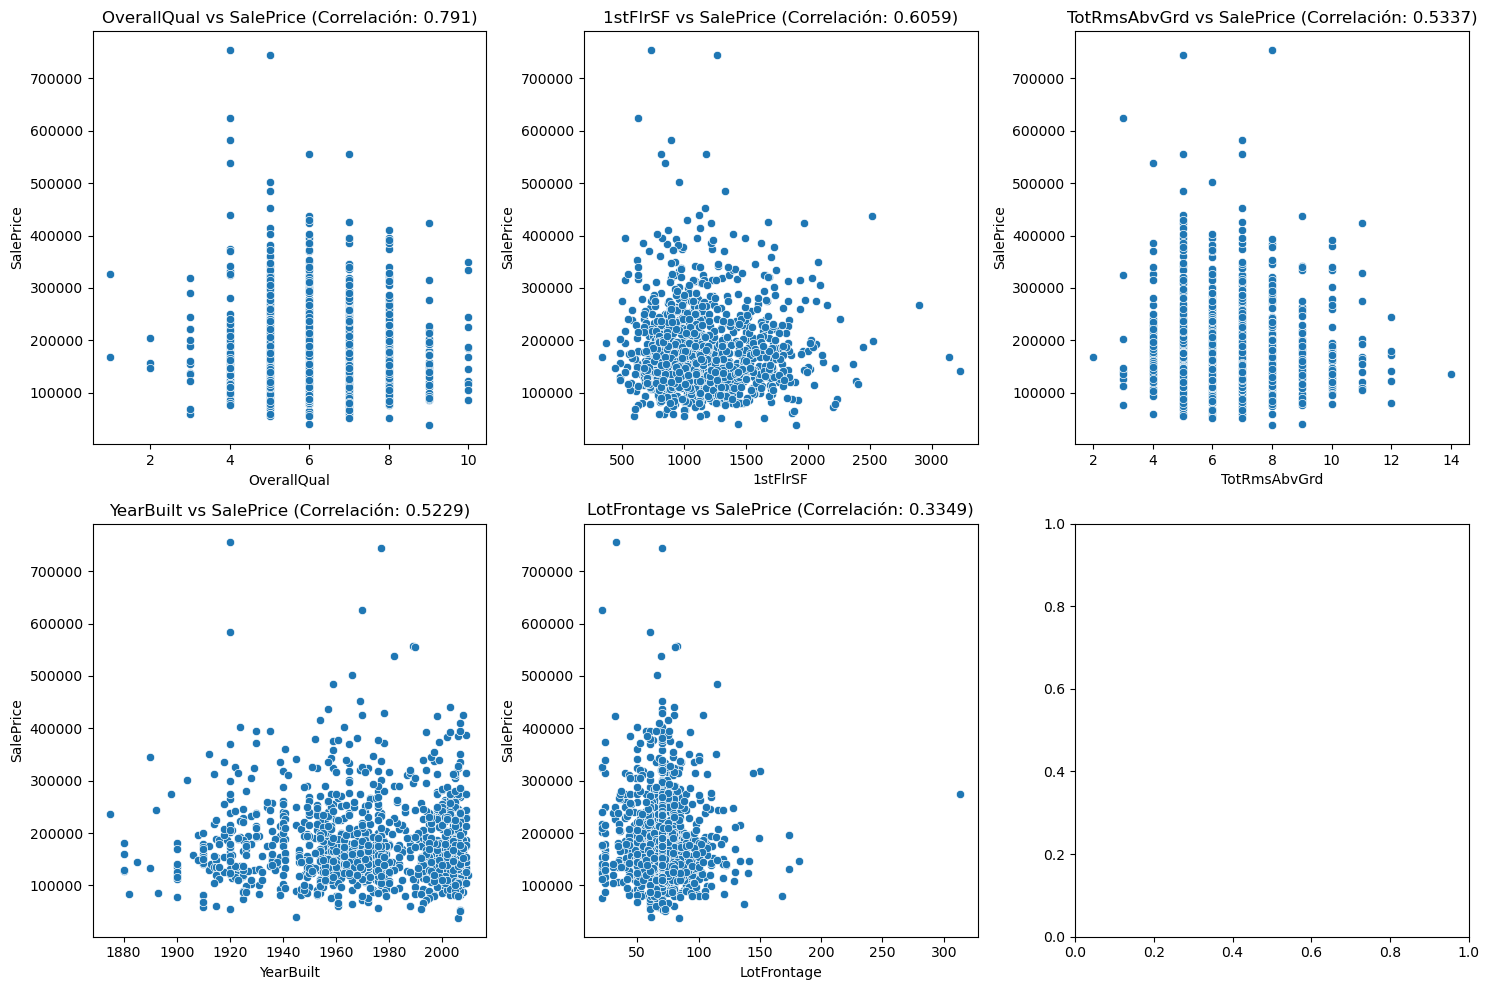

In [32]:
# Scatterplots de cada variable en relación a SalePrice (una sola vista 2x3)
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, variable in enumerate(columnas[1:]):
    corr, _ = pearsonr(df[variable], df['SalePrice'])
    ax = axes[i//3, i%3]
    sns.scatterplot(x=df[variable], y=df_train["SalePrice"], ax=ax)
    ax.set_title(f"{variable} vs SalePrice (Correlación: {round(corr,4)})")
plt.tight_layout()
plt.show()

In [33]:
# Crear un diccionario para almacenar las correlaciones
correlations = {}

for col in df.columns[1:]:
    corr, _ = pearsonr(df[col], df['SalePrice'])
    correlations[col] = corr

# Ordenar las variables por su correlación con SalePrice, en orden descendente
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Tomar las dos variables con la mayor correlación
top_variables = sorted_correlations[:2]
print(f"Las dos variables con mayor correlación con SalePrice son: {top_variables}")

Las dos variables con mayor correlación con SalePrice son: [('OverallQual', 0.7909816005838053), ('1stFlrSF', 0.6058521846919146)]


In [34]:
def normalizar(x):
    """
    Normaliza un array de datos, restando su media y dividiendo entre su desviación estándar.

    Esta función transforma los datos de entrada para que tengan una media de 0 y una desviación estándar de 1.

    Args:
        x (array-like): Un array o lista de valores numéricos a normalizar.

    Returns:
        tuple: Un tuple que contiene:
            - El array normalizado.
            - La media de los datos originales.
            - La desviación estándar de los datos originales.
    """
    return (x - np.mean(x)) / np.std(x), np.mean(x), np.std(x)

In [35]:
def entrenar_regresion_lineal(x, y, epochs=1000, imprimir_error_cada=100, alpha=0.01): 
    """
    Entrena un modelo de regresión lineal utilizando gradiente descendente.

    Esta función entrena un modelo de regresión lineal con los datos de entrada utilizando el algoritmo de gradiente descendente.
    Actualiza los parámetros del modelo en cada iteración y calcula el error cuadrático medio (MSE).

    Args:
        x (array-like): Un array o lista de características de entrada (variables independientes).
        y (array-like): Un array o lista de valores de salida (variable dependiente).
        epochs (int, opcional): El número de iteraciones para el entrenamiento (por defecto es 1000).
        imprimir_error_cada (int, opcional): La frecuencia con la que se imprime el error durante el 
        entrenamiento (por defecto es cada 100 iteraciones).
        alpha (float, opcional): La tasa de aprendizaje para el gradiente descendente (por defecto es 0.01).

    Returns:
        tuple: Un tuple que contiene:
            - historial_modelos (dict): Un diccionario con los parámetros del modelo (pendientes e intercepto) para cada iteración.
            - errores (list): Una lista de los errores (MSE) calculados en cada iteración.
    """
    n = len(x)
    X = np.column_stack((x, np.ones(n)))
    parametros = np.random.randn(2)
    historial_modelos = {}
    errores = []
    
    for epoch in range(epochs):
        y_pred = X @ parametros
        error = np.mean((y_pred - y)**2) / 2
        errores.append(error)
        gradientes = X.T @ (y_pred - y) / n
        parametros -= alpha * gradientes
        historial_modelos[epoch] = parametros.copy()
        
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración {epoch + 1}: Error = {error:.4f}")
    
    return historial_modelos, errores

In [36]:
def graficar_resultado(x_original, y_original, x_norm, y_mean, y_std, parametros, etiqueta_x):
    """
    Grafica los datos originales y la línea de regresión lineal ajustada.

    Esta función crea una visualización que muestra los datos originales (dispersos) y la línea de regresión
    ajustada, desnormalizando las predicciones para mostrarlas en la escala original de los datos.

    Args:
        x_original (array-like): Un array o lista de los valores de la variable independiente 
                    (por ejemplo, características de entrada).
        y_original (array-like): Un array o lista de los valores de la variable dependiente 
                    (por ejemplo, valores de salida).
        x_norm (array-like): Un array o lista de los valores normalizados de la variable independiente 
                    (no utilizado directamente en la visualización).
        y_mean (float): La media de los valores originales de la variable dependiente, utilizada para desnormalizar las predicciones.
        y_std (float): La desviación estándar de los valores originales de la variable dependiente, 
                    utilizada para desnormalizar las predicciones.
        parametros (array-like): Un array con los parámetros (pendiente e intercepto) del modelo de regresión lineal ajustado.
        etiqueta_x (str): Una cadena de texto que describe la variable independiente (para etiquetar el eje x en el gráfico).

    Returns:
        None: La función muestra un gráfico pero no retorna ningún valor.
    """
    x_sorted = np.sort(x_original)
    x_sorted_norm = (x_sorted - np.mean(x_original)) / np.std(x_original)
    X_plot = np.column_stack((x_sorted_norm, np.ones(len(x_sorted_norm))))
    y_pred = X_plot @ parametros
    y_pred = y_pred * y_std + y_mean

    plt.figure(figsize=(10, 6))
    plt.scatter(x_original, y_original, color="blue", label="Datos reales", alpha=0.6)
    plt.plot(x_sorted, y_pred, color="red", label="Línea de regresión", linewidth=2)
    plt.xlabel(etiqueta_x)
    plt.ylabel("SalePrice")
    plt.title(f"Regresión Lineal: {etiqueta_x} vs SalePrice")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Iteración 100: Error = 0.5479
Iteración 200: Error = 0.3378
Iteración 300: Error = 0.3096
Iteración 400: Error = 0.3058
Iteración 500: Error = 0.3053
Iteración 600: Error = 0.3053
Iteración 700: Error = 0.3053
Iteración 800: Error = 0.3053
Iteración 900: Error = 0.3053
Iteración 1000: Error = 0.3053


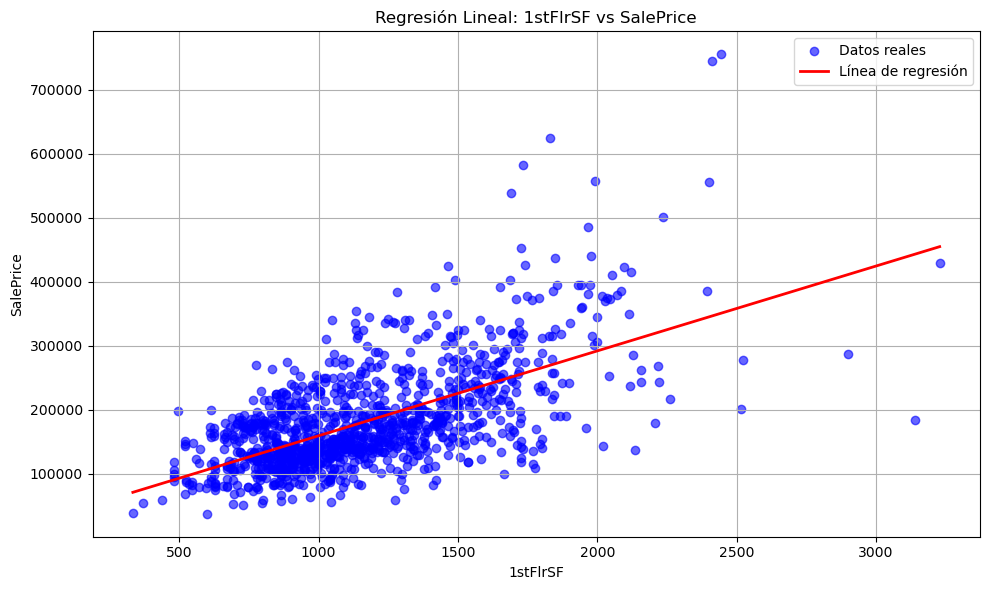

In [37]:
# Para 1stFlrSF (TRAINING)
x = df_train["1stFlrSF"].values
y = df_train["SalePrice"].values

x_norm, x_mean, x_std = normalizar(x)
y_norm, y_mean, y_std = normalizar(y)

historial, errores = entrenar_regresion_lineal(x_norm, y_norm, alpha=0.01)
param_final = historial[max(historial.keys())]

graficar_resultado(x, y, x_norm, y_mean, y_std, param_final, etiqueta_x="1stFlrSF")

Iteración 100: Error = 0.5038
Iteración 200: Error = 0.3725
Iteración 300: Error = 0.3549
Iteración 400: Error = 0.3525
Iteración 500: Error = 0.3522
Iteración 600: Error = 0.3521
Iteración 700: Error = 0.3521
Iteración 800: Error = 0.3521
Iteración 900: Error = 0.3521
Iteración 1000: Error = 0.3521


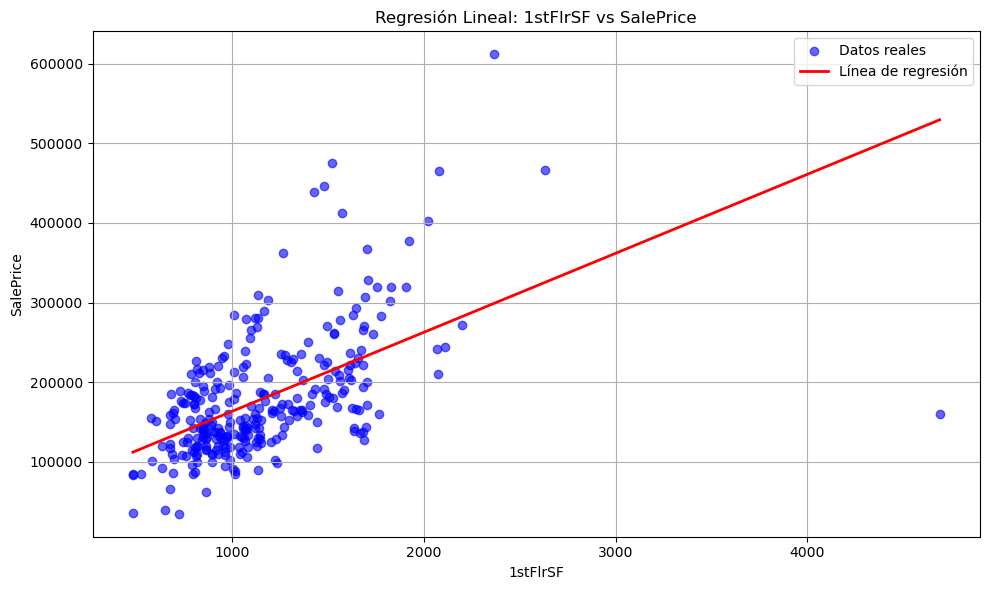

In [38]:
# Para 1stFlrSF (VALIDACIÓN)
x = df_val["1stFlrSF"].values
y = df_val["SalePrice"].values

x_norm, x_mean, x_std = normalizar(x)
y_norm, y_mean, y_std = normalizar(y)

historial, errores = entrenar_regresion_lineal(x_norm, y_norm, alpha=0.01)
param_final = historial[max(historial.keys())]

graficar_resultado(x, y, x_norm, y_mean, y_std, param_final, etiqueta_x="1stFlrSF")

Iteración 100: Error = 0.7473
Iteración 200: Error = 0.2662
Iteración 300: Error = 0.2017
Iteración 400: Error = 0.1931
Iteración 500: Error = 0.1919
Iteración 600: Error = 0.1918
Iteración 700: Error = 0.1917
Iteración 800: Error = 0.1917
Iteración 900: Error = 0.1917
Iteración 1000: Error = 0.1917


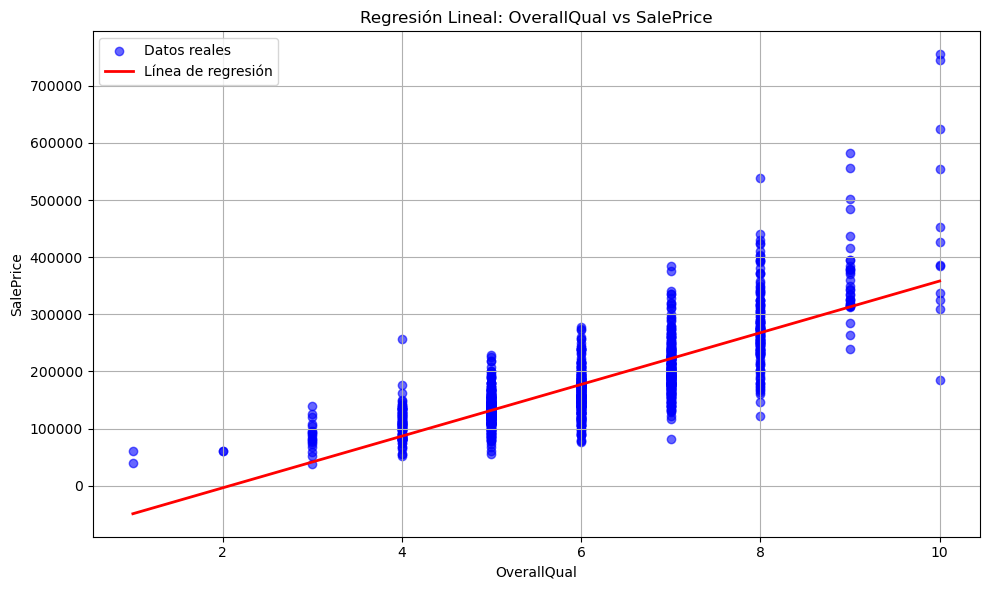

In [39]:
# Para OverallQual (TRAINING)
x = df_train["OverallQual"].values
y = df_train["SalePrice"].values

x_norm, x_mean, x_std = normalizar(x)
y_norm, y_mean, y_std = normalizar(y)

historial, errores = entrenar_regresion_lineal(x_norm, y_norm, alpha=0.01)
param_final = historial[max(historial.keys())]

graficar_resultado(x, y, x_norm, y_mean, y_std, param_final, etiqueta_x="OverallQual")

Iteración 100: Error = 0.3177
Iteración 200: Error = 0.1865
Iteración 300: Error = 0.1689
Iteración 400: Error = 0.1666
Iteración 500: Error = 0.1663
Iteración 600: Error = 0.1662
Iteración 700: Error = 0.1662
Iteración 800: Error = 0.1662
Iteración 900: Error = 0.1662
Iteración 1000: Error = 0.1662


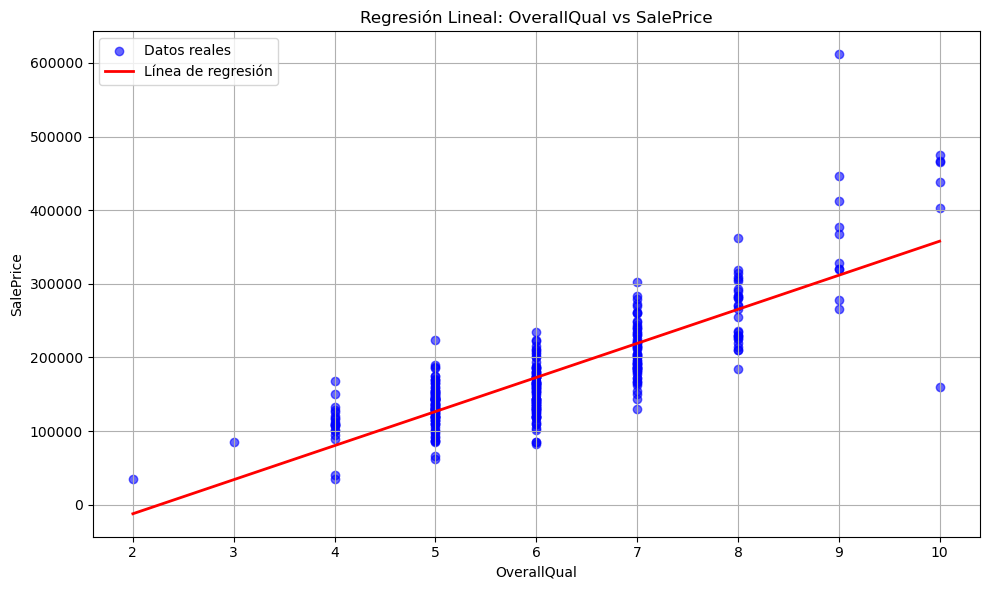

In [40]:
# Para OverallQual (VALIDACIÓN)
x = df_val["OverallQual"].values
y = df_val["SalePrice"].values

x_norm, x_mean, x_std = normalizar(x)
y_norm, y_mean, y_std = normalizar(y)

historial, errores = entrenar_regresion_lineal(x_norm, y_norm, alpha=0.01)
param_final = historial[max(historial.keys())]

graficar_resultado(x, y, x_norm, y_mean, y_std, param_final, etiqueta_x="OverallQual")